# Logistic Regression

**Logistic Regression**

Logistic Regression stands out as a powerful supervised learning classification algorithm. Logistic Regression model is primarily used for classification purposes.

It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes, for example, like 'will buy' or 'will not buy,' based on a dataset of independent variables.

The outcome should be a categorical or a discrete value. The outcome can be either a 0 and 1, true and false, yes and no, and so on.

Unlike linear regression, which fits a regression line, logistic regression fits an 'S'-shaped logistic function(Sigmoid function).

**Why do we use Logistic Regression?**

When dealing with two or more classes. Well, that's because logistic regression helps us with classification problems, where we want to sort things into different categories.


**What is Sigmoid function in logistic regression?**

The Sigmoid function in logistic regression ensures that the predictions we make fall between 0 and 1, which is perfect for our classification needs. It's like saying, 'Is this a yes or no?' or 'Does this belong to group A or group B?' The S-shaped curve helps us achieve this, making logistic regression a great choice for these kinds of questions."

The sigmoid function, also known as the logistic function, is represented by the formula:

***hθ(x)= 1/ 1+e-z***




**What sigmoid function does?**

When we input a value into the Sigmoid function, it squishes the value to fall within the 0 to 1 range, which aligns perfectly with the probability scale (0 to 100%).

**Why It Matters:**

In logistic regression, we're interested in probabilities. This probability value is mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class, we select a threshold value. This threshold value is called **Decision boundary**.

For example, the probability that an email is spam or the probability that a student will pass an exam. The Sigmoid function ensures that our predictions are valid probabilities, making it clear and interpretable.

We can then set a threshold (e.g., 0.5) and say, "If the predicted probability is greater than 0.5, let's classify it as Class 1; otherwise, classify it as Class 0."

**Types of logistic regression :**

Binary logistic regression:
Binary type of logistic regression where the outcome is a 0/1, True/False, and so on. There are two more types:

Multinomial logistic regression:
This type of regression has three or more unordered types of dependent variables, such as cats/dogs/donkeys.

Ordinal logistic regression:
Has three or more ordered dependent variables such as poor/average/ good or high/medium/average.


**Assumptions of logistic regression:**

The dependent variable is binary or multinomial or ordinal in nature.

The observations or independent variables have very little or no multicollinearity, independent variables should not be too highly correlated with each other.

There are no extreme outliers.

There is a linear relationship between the predictor variables and the log-odds of the response variable.

Large sample sizes for a more reliable analysis.

# Applying Logistic Regresion Machine Learning

# Import Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Dataset

Context of the Dataset : Predict next-day rain by training classification models on the target variable RainTomorrow.

**Goal: Using logistic regression to predict two discrete classes,'will RainTomorrow' or 'will not RainTomorrow,' based on a dataset of independent variables.**


Dataset: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Explotarory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118836 entries, 0 to 118835
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           118836 non-null  object 
 1   Location       118836 non-null  object 
 2   MinTemp        117519 non-null  float64
 3   MaxTemp        117712 non-null  float64
 4   Rainfall       115907 non-null  float64
 5   Evaporation    66901 non-null   float64
 6   Sunshine       61748 non-null   float64
 7   WindGustDir    108974 non-null  object 
 8   WindGustSpeed  109000 non-null  float64
 9   WindDir9am     109681 non-null  object 
 10  WindDir3pm     114909 non-null  object 
 11  WindSpeed9am   117218 non-null  float64
 12  WindSpeed3pm   115927 non-null  float64
 13  Humidity9am    116406 non-null  float64
 14  Humidity3pm    115303 non-null  float64
 15  Pressure9am    107969 non-null  float64
 16  Pressure3pm    108004 non-null  float64
 17  Cloud9am       74041 non-null

**Types of variables**

Important to check out types of variable in the dataset, segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

In [ ]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(exclude='object').columns

In [ ]:
cat_features

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
num_features

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
df[cat_features].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [ ]:
df[num_features].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


**NaN Values:**

In [ ]:
df[cat_features].isnull().sum()

Date               0
Location           0
WindGustDir     9862
WindDir9am      9155
WindDir3pm      3927
RainToday       2930
RainTomorrow    2932
dtype: int64

In [ ]:
df[num_features].isnull().sum()

MinTemp           1317
MaxTemp           1124
Rainfall          2929
Evaporation      51935
Sunshine         57088
WindGustSpeed     9836
WindSpeed9am      1618
WindSpeed3pm      2909
Humidity9am       2430
Humidity3pm       3533
Pressure9am      10867
Pressure3pm      10832
Cloud9am         44795
Cloud3pm         47632
Temp9am           1640
Temp3pm           2803
dtype: int64

In Catagorical feature  WindGustDir, WindDir9am, WindDir3pm, RainToday,RainTomorrow has Null Values.

In [ ]:
df['Date']

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
118831    2012-05-17
118832    2012-05-18
118833    2012-05-19
118834    2012-05-20
118835    2012-05-21
Name: Date, Length: 118836, dtype: object

**Cardinality**

**Low cardinality:** If there's only one category in a column, it won't provide any unique information to our model. Low cardinality means the observation in the columns has constant value which means same value in all the rows of the columns. Ex. type of building has only apartment. So don’t include in the model. Drop

**High cardinality:** as low cardinality don’t give you same information to the model, High cardinality doesn’t give any information to the model. Can drop also.

As low cardinality gives low or no information and high cardinality is overload with information which both doesn’t help the model since model looks for trend.

Feature engineering of Date Columns

In [ ]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 118836 entries, 0 to 118835
Series name: Date
Non-Null Count   Dtype 
--------------   ----- 
118836 non-null  object
dtypes: object(1)
memory usage: 928.5+ KB


In [ ]:
# covert into datetime format from strings data type

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Extract year, month, day from date columns

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
# now drop Date columns

df.drop('Date', axis=1, inplace = True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
# unique() function helps to check Cardinality
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport'],
      dtype=object)

In [ ]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Brisbane            3193
Adelaide            3193
Albury              3040
GoldCoast           3040
Cairns              3040
Bendigo             3040
Ballarat            3040
MountGinini         3040
Wollongong          3040
Townsville          3040
MountGambier        3040
Albany              3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
Portland            3009
Nuriootpa           3009
Woomera             3009
Witchcliffe         3009
PearceRAAF          3009
Dartmoor            3009
Watsonia            3009
Sale                3009
Mildura             3009
MelbourneAirport    3009
BadgerysCreek       3009
Williamtown         3009
WaggaWagga          3009
SydneyAirport       3009
Richmond            3009
NorfolkIsland       3009
Moree               3009
CoffsHarbour        3009
Cobar               3009
NorahHead           3004
Nhil                1578
PerthAirport        1207


In [ ]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
df['WindGustDir'].value_counts()

W      8889
S      7999
N      7953
WSW    7876
SSE    7788
SE     7320
SW     7271
SSW    6907
ENE    6750
E      6721
WNW    6707
NE     6086
NNE    5778
NW     5491
ESE    5250
NNW    4188
Name: WindGustDir, dtype: int64

In [ ]:
df['WindDir9am'].unique()


array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
df['WindDir9am'].value_counts()

N      10029
SSE     7829
SW      7657
S       7589
W       7482
SE      7258
NW      6870
NNE     6799
SSW     6705
E       6325
WSW     6279
WNW     6244
NE      6067
ENE     5810
NNW     5394
ESE     5344
Name: WindDir9am, dtype: int64

In [ ]:
df['WindDir3pm'].unique()


array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [ ]:
df['WindDir3pm'].value_counts()

W      8672
S      8532
SE     8391
WSW    8133
SSE    7696
N      7625
SW     7569
NE     7442
WNW    6952
ENE    6769
E      6753
SSW    6701
ESE    6327
NW     6168
NNE    5829
NNW    5350
Name: WindDir3pm, dtype: int64

In [ ]:
df['RainToday'].unique()


array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['RainToday'].value_counts()

No     89396
Yes    26510
Name: RainToday, dtype: int64

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df['RainTomorrow'].value_counts()

No     89395
Yes    26509
Name: RainTomorrow, dtype: int64

**Statistics of Numerical Features**

In [ ]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,117519.0,11.989336,6.232848,-8.5,7.5,11.9,16.6,33.9
MaxTemp,117712.0,22.785812,6.893829,-4.8,17.8,22.4,27.5,48.1
Rainfall,115907.0,2.404930,8.588866,0.0,0.0,0.0,0.8,371.0
Evaporation,66901.0,5.317759,4.258695,0.0,2.6,4.4,7.2,145.0
Sunshine,61748.0,7.446246,3.818779,0.0,4.6,8.2,10.5,14.5
WindGustSpeed,109000.0,40.015725,13.842530,7.0,30.0,39.0,48.0,135.0
WindSpeed9am,117218.0,14.046870,9.144256,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,115927.0,18.871712,9.117393,0.0,13.0,19.0,24.0,87.0
Humidity9am,116406.0,70.164270,18.299556,0.0,58.0,71.0,84.0,100.0
Humidity3pm,115303.0,52.651796,20.513244,0.0,38.0,53.0,67.0,100.0


**Outlier**

Looks Like, the columns (**Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm**) may contain outliers by looking at the min, mid, max number.

Check Outlier through BoxPlot

Text(0, 0.5, 'WindSpeed3pm')

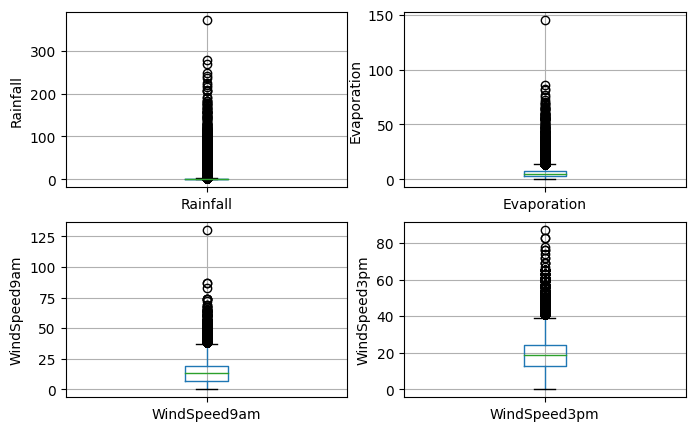

In [ ]:
plt.figure(figsize=(8,5))

#Rainfall
plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

#Evaporation
plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

#WindSpeed9am
plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

#WindSpeed3pm
plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')




**Statistical tool :  The 5-number summary**

The 5-number summary is a valuable statistical tool for understanding data distribution and identifying outliers. It consists of five key values, look above code 'describe ()':
- the minimum (smallest data point),
- the first quartile (Q1),
- the median (Q2 or the second quartile),
- the third quartile (Q3), and
- the maximum (largest data point).


**To detect outliers**

we focus on the interquartile range **(IQR)**,

calculated as:

**IQR = Q3 - Q1**

This IQR represents the middle 50% of the data.

Outliers are identified as values that fall significantly lower fence and higher fence.

**Lower fence = Q1 - 1.5 * IQR**

**Higher fence = Q3 + 1.5 * IQR**

Essentially, the 5-number summary with IQR helps us pinpoint unusual data points that might deviate from the overall pattern and warrant closer investigation.


In [ ]:
# lower and higher fence of Rainfall columns
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.Rainfall.quantile(0.75) + (1.5 * IQR)

print('Lower fence of Rainfall:',Lower_fence)
print('Higher fence of Rainfall:',Higher_fence)

Lower fence of Rainfall: -1.2000000000000002
Higher fence of Rainfall: 2.0


In [ ]:
# lower and higher fence of Evaporation columns
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.Evaporation.quantile(0.75) + (1.5 * IQR)

print('Lower fence of Evaporation:',Lower_fence)
print('Higher fence of Evaporation:',Higher_fence)

Lower fence of Evaporation: -4.299999999999999
Higher fence of Evaporation: 14.1


In [ ]:
# lower and higher fence of WindSpeed9am columns
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.WindSpeed9am.quantile(0.75) + (1.5 * IQR)

print('Lower fence of WindSpeed9am:',Lower_fence)
print('Higher fence of WindSpeed9am:',Higher_fence)

Lower fence of WindSpeed9am: -11.0
Higher fence of WindSpeed9am: 37.0


In [ ]:
# lower and higher fence of WindSpeed3pm columns
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (1.5 * IQR)
Higher_fence = df.WindSpeed3pm.quantile(0.75) + (1.5 * IQR)

print('Lower fence of WindSpeed3pm:',Lower_fence)
print('Higher fence of WindSpeed3pm:',Higher_fence)

Lower fence of WindSpeed3pm: -3.5
Higher fence of WindSpeed3pm: 40.5


# Split

In [ ]:
# split into target variable and feature matrix
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
# split into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (95068, 24)
y_train: (95068,)
X_test: (23768, 24)
y_test: (23768,)


In [ ]:
X_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Year', 'Month', 'Day'],
      dtype='object')

# Feature Engineering

**What is feature engineering?**


Feature Engineering is like turning plain data into valuable building blocks for our model. These 'building blocks' help our model understand things better and make more accurate predictions. We do this by playing around with different types of data and shaping them into something our model can use effectively.

In [ ]:
cat_col = X_train.select_dtypes(include='object').columns
num_col = X_train.select_dtypes(exclude='object').columns

**Handling the NaN values**

In [ ]:
X_train[cat_col].isnull().sum()

Location          0
WindGustDir    7906
WindDir9am     7383
WindDir3pm     3132
RainToday      2365
dtype: int64

In [ ]:
X_train[num_col].isnull().sum()

MinTemp           1061
MaxTemp            912
Rainfall          2364
Evaporation      41609
Sunshine         45791
WindGustSpeed     7880
WindSpeed9am      1308
WindSpeed3pm      2323
Humidity9am       1962
Humidity3pm       2823
Pressure9am       8706
Pressure3pm       8679
Cloud9am         35976
Cloud3pm         38236
Temp9am           1335
Temp3pm           2249
Year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
y_train.isnull().sum()

2355

In [ ]:
y_test.isnull().sum()

577

Deleting the rows with Null values in target column because in compare to the size of total data null values in target column are very low and it is better to not making changes or edit in target column

In [ ]:
y_train = y_train.notna()

In [ ]:
y_test = y_test.notna()

In [ ]:
y_train.isnull().sum()

0

In [ ]:
y_test.isnull().sum()

0

**Imputatiuon**

There are two methods can be used to impute missing values.
- mean or median imputation
- random sample imputation.

When there are outliers in the dataset, we should use median imputation.

Imputation on Numerical values

In [ ]:
# Fill missing values in numerical columns with their respective medians for both X_train and X_test
for df1 in [X_train, X_test]:
    for col in num_col:
        col_median = X_train[col].median()  # Calculate median for the column
        df1[col].fillna(col_median, inplace=True)  # Fill missing values in the column with the median


In [ ]:
X_train[num_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Handling NaN values of catagorical variable

**Simple Imputer**

SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder.

It is implemented by the use of the SimpleImputer() method which takes the following arguments :

missing_values : The missing_values placeholder which has to be imputed. By default is NaN

strategy: The data which will replace the NaN values from the dataset. The strategy argument can take the values – **‘mean'(default)**, **‘median’**, **‘most_frequent’** and **‘constant’**.

In [ ]:
X_train[cat_col].isnull().sum()

Location          0
WindGustDir    7906
WindDir9am     7383
WindDir3pm     3132
RainToday      2365
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform on X_train
X_train[cat_col] = imputer.fit_transform(X_train[cat_col])

# Transform X_test
X_test[cat_col] = imputer.transform(X_test[cat_col])


In [ ]:
X_train[cat_col].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
X_test[cat_col].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

# One Hot Encoding(OHE)

OHE is the standard approach to encode categorical data.

One hot encoding (OHE) creates a binary variable for each one of the different categories present in a variable. These binary variables take 1 if the observation shows a certain category or 0 otherwise. OHE is suitable for linear models.

One hot encoding (OHE) creates by replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation. Each one of the boolean variables are also known as dummy variables or binary variables.

For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise.

Here, we do One Hot Encoding of Catagotical variable and get k-1 dummy variables after One Hot Encoding

In [ ]:
# One-hot encode the specified columns
encoded_location = pd.get_dummies(X_train['Location'])
encoded_wind_gust_dir = pd.get_dummies(X_train['WindGustDir'])
encoded_wind_dir_9am = pd.get_dummies(X_train['WindDir9am'])
encoded_wind_dir_3pm = pd.get_dummies(X_train['WindDir3pm'])
encoded_RainToday = pd.get_dummies(X_train['RainToday'])

# Concatenate the one-hot encoded columns to X_train
X_train = pd.concat([X_train, encoded_location, encoded_wind_gust_dir, encoded_wind_dir_9am, encoded_wind_dir_3pm, encoded_RainToday], axis=1)

# Drop the original categorical columns
X_train.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1, inplace=True)

# Display the updated X_train DataFrame
print(X_train)



        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
29252      14.9     29.6       0.0          4.4       8.2           31.0   
61381       1.4     17.4       0.0          2.4       8.3           57.0   
33915      20.9     28.7       1.2          5.4       9.2           52.0   
25942      18.5     23.4      22.2          4.4       8.2           24.0   
14627      14.1     35.3       0.0          4.4       8.2           31.0   
...         ...      ...       ...          ...       ...            ...   
45891       6.1     17.2       4.0          2.2       2.4           59.0   
117952     11.9     22.0       3.8          6.2       7.7           35.0   
42613      20.3     26.8       0.0          4.4       8.2           43.0   
43567      12.0     16.7       0.8          4.4       8.2           50.0   
68268      10.0     15.8       0.2          1.2       5.0           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  S  SE  SSE  \
29252 

In [ ]:
# One-hot encode the specified columns for X_test
encoded_location_test = pd.get_dummies(X_test['Location'])
encoded_wind_gust_dir_test = pd.get_dummies(X_test['WindGustDir'])
encoded_wind_dir_9am_test = pd.get_dummies(X_test['WindDir9am'])
encoded_wind_dir_3pm_test = pd.get_dummies(X_test['WindDir3pm'])
encoded_RainToday_test = pd.get_dummies(X_test['RainToday'])

# Concatenate the one-hot encoded columns to X_test
X_test = pd.concat([X_test, encoded_location_test, encoded_wind_gust_dir_test, encoded_wind_dir_9am_test, encoded_wind_dir_3pm_test,encoded_RainToday_test], axis=1)

# Drop the original categorical columns
X_test.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'], axis=1, inplace=True)

# Display the updated X_test DataFrame
print(X_test)


        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
38894       6.9     21.7       0.0          4.0       9.1           37.0   
5731        1.0     17.8       0.0          4.4       8.2           24.0   
110849     12.3     16.0       1.6          2.6       3.6           39.0   
29560      17.1     29.2       0.4         12.8       8.2           30.0   
74674       0.8     13.6       0.0          4.4       8.2           30.0   
...         ...      ...       ...          ...       ...            ...   
116571      6.6     19.0       0.0          4.4       9.5           41.0   
108747      8.6     19.1       0.0          2.0       9.2           39.0   
32521      15.6     22.1       0.0         12.0      11.3           61.0   
54540       1.0     16.9       0.0          4.4       8.2           46.0   
13679       9.7     27.9       0.0          5.8      10.7           46.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  S  SE  SSE  \
38894 

In [ ]:
X_train.shape

(95068, 109)

In [ ]:
X_test.shape

(23768, 109)

**Feature Scaling**

**Normalization**

Normalization is a technique in feature scaling that helps bring all feature values into the range [0, 1].

It's particularly useful when the features have different units or scales, ensuring they have a consistent impact on the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[5.51886792e-01, 6.45593870e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.33490566e-01, 4.11877395e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.93396226e-01, 6.28352490e-01, 3.23450135e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.79245283e-01, 5.91954023e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.83490566e-01, 3.98467433e-01, 2.15633423e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.36320755e-01, 3.81226054e-01, 5.39083558e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

# Building Model

Baseline: The first step in building a model is baselining. To do this, ask yourself how you will know if the model you build is performing well?"

One way to think about this is to see how a "dumb" model would perform on the same data. Some people also call this a naïve or baseline model, but it's always a model makes only one prediction prediction should be.

Calculate the mean of your target vector y_train and assign it to the variable y_mean.

Now that we have the one prediction that our dumb model will always make, we need to generate a list that repeats the prediction for every observation in our dataset

In [ ]:


y_mean = y_train.mean()

print("Mean score:", y_mean)


Mean score: 0.9752282576681954


y_train.mean() calculates the mean (average) of these target values, which is stored in the variable y_mean. It's the average math score of all students in the training set.


# Model Training
The steps to building and using a model are:

Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

Fit: Capture patterns from provided data. This is the heart of modeling.

Predict: Just what it sounds like

Evaluate: Determine how accurate the model's predictions are.

Fitting simple linear regression

Import the Logistic Regression class from the linear_model to train the model. Instantiate an object of the class named regressor.

**Define the model**

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
clf = LogisticRegression(random_state=0)

**Fit The Model**

In [ ]:
# fit the model
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

**Predict The Model**

In [ ]:
y_pred= clf.predict(X_test)

y_pred

array([ True,  True,  True, ...,  True,  True,  True])

**Predicting test set result**

At this point, the model is now trained and ready to predict the output of new observations. Remember, we split our dataset into train and test sets. We will provide test sets to the model and check its performance.

In [ ]:
#y_test and y_pred are your actual and predicted labels
prediction_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Prediction Correct': y_test == y_pred  # True if prediction is correct, False otherwise
})

# Display the prediction_df DataFrame
print(prediction_df)

        Actual Value  Predicted Value  Prediction Correct
38894           True             True                True
5731            True             True                True
110849          True             True                True
29560           True             True                True
74674           True             True                True
...              ...              ...                 ...
116571          True             True                True
108747          True             True                True
32521           True             True                True
54540           True             True                True
13679           True             True                True

[23768 rows x 3 columns]


**Evaluate the Model**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score:{0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score:0.9747


Check for overfitting and underfitting:

In [ ]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9745
Test set score: 0.9747


The training-set accuracy score is 0.9766 while the test-set accuracy to be 0.9768. These two values are quite comparable.

So, there is no question of overfitting.

**Performance Matrix**

In a classification problem, particularly when using logistic regression with a sigmoid curve, the common way to assess the model's performance is through various evaluation metrics. Some common metrics to evaluate the model's performance include:

1. **Accuracy:** The proportion of correctly classified instances out of the total instances. It's a good starting point for evaluating the overall performance of the model.

2. **Precision:** The proportion of true positive predictions out of the total predicted positives. It's useful when the cost of false positives is high.

3. **Recall (Sensitivity):** The proportion of true positive predictions out of the total actual positives. It's useful when the cost of false negatives is high.

4. **F1 Score:** The harmonic mean of precision and recall. It provides a balance between precision and recall.

5. **Confusion Matrix:** A table that summarizes true positive, true negative, false positive, and false negative predictions.

To calculate and understand these metrics, you typically compare the predicted labels (obtained from the sigmoid curve) with the actual labels. For example, in Python using scikit-learn, you can use the `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `confusion_matrix` functions to calculate these metrics.

Here's a general example of how you might calculate these scores:


These scores give you insights into how well your logistic regression model is performing in terms of classification accuracy and the balance between true positives, false positives, true negatives, and false negatives.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.25      0.02      0.04       577
        True       0.98      1.00      0.99     23191

    accuracy                           0.97     23768
   macro avg       0.61      0.51      0.51     23768
weighted avg       0.96      0.97      0.96     23768



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test and y_pred are your actual and predicted labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.9747139010434197
Precision: 0.9761804384485666
Recall: 0.9984476736665086
F1 Score: 0.98718850589414
Confusion Matrix:
 [[   12   565]
 [   36 23155]]


**confusion matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[   12   565]
 [   36 23155]]

True Positives(TP) =  12

True Negatives(TN) =  23155

False Positives(FP) =  565

False Negatives(FN) =  36
